# **Introduction**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**What is Machine Learning?**

Machine Learning (ML) is a field of artificial intelligence (AI) that focuses on developing algorithms and statistical models that allow computers to learn from and make predictions or decisions based on data without being explicitly programmed for each task.

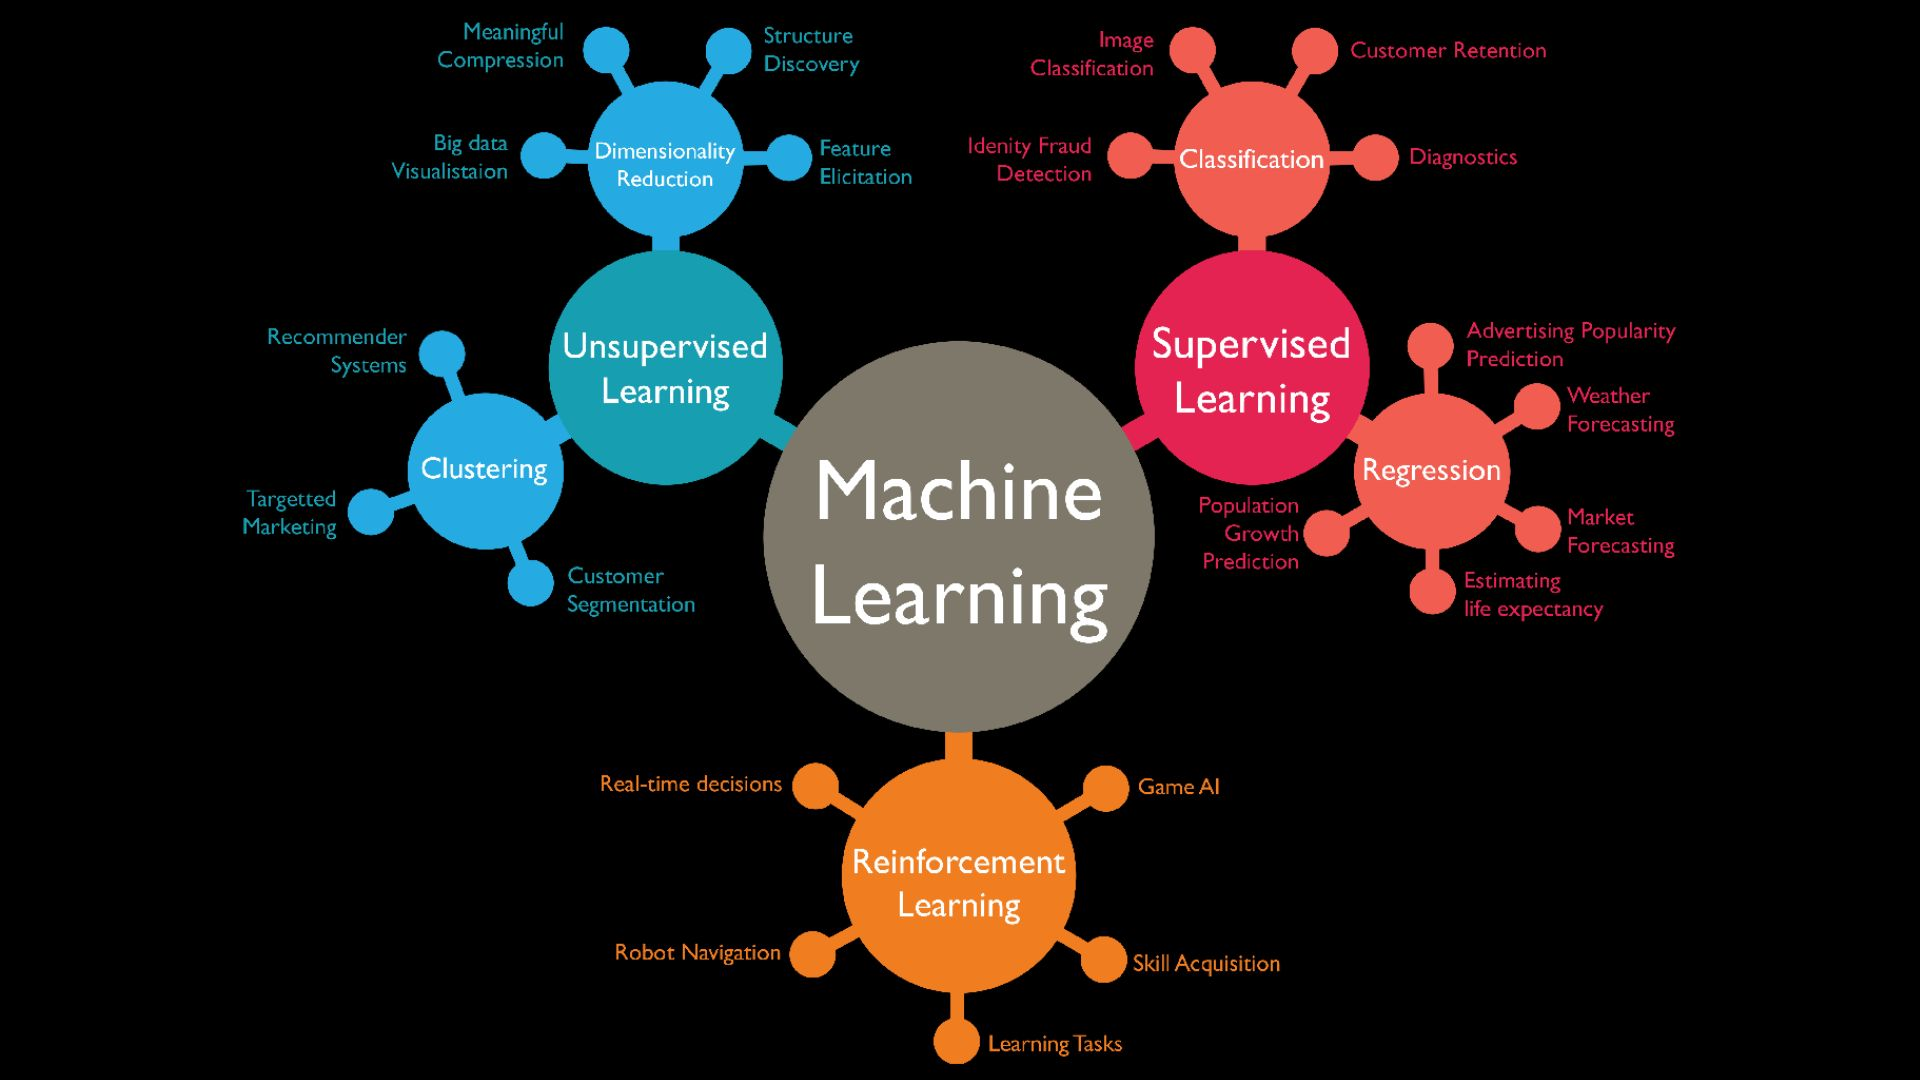

### **Supervised Learning**


The model is trained on labeled data, where the input-output pairs are provided. The goal is to learn a mapping from inputs to outputs. Examples include classification and regression.

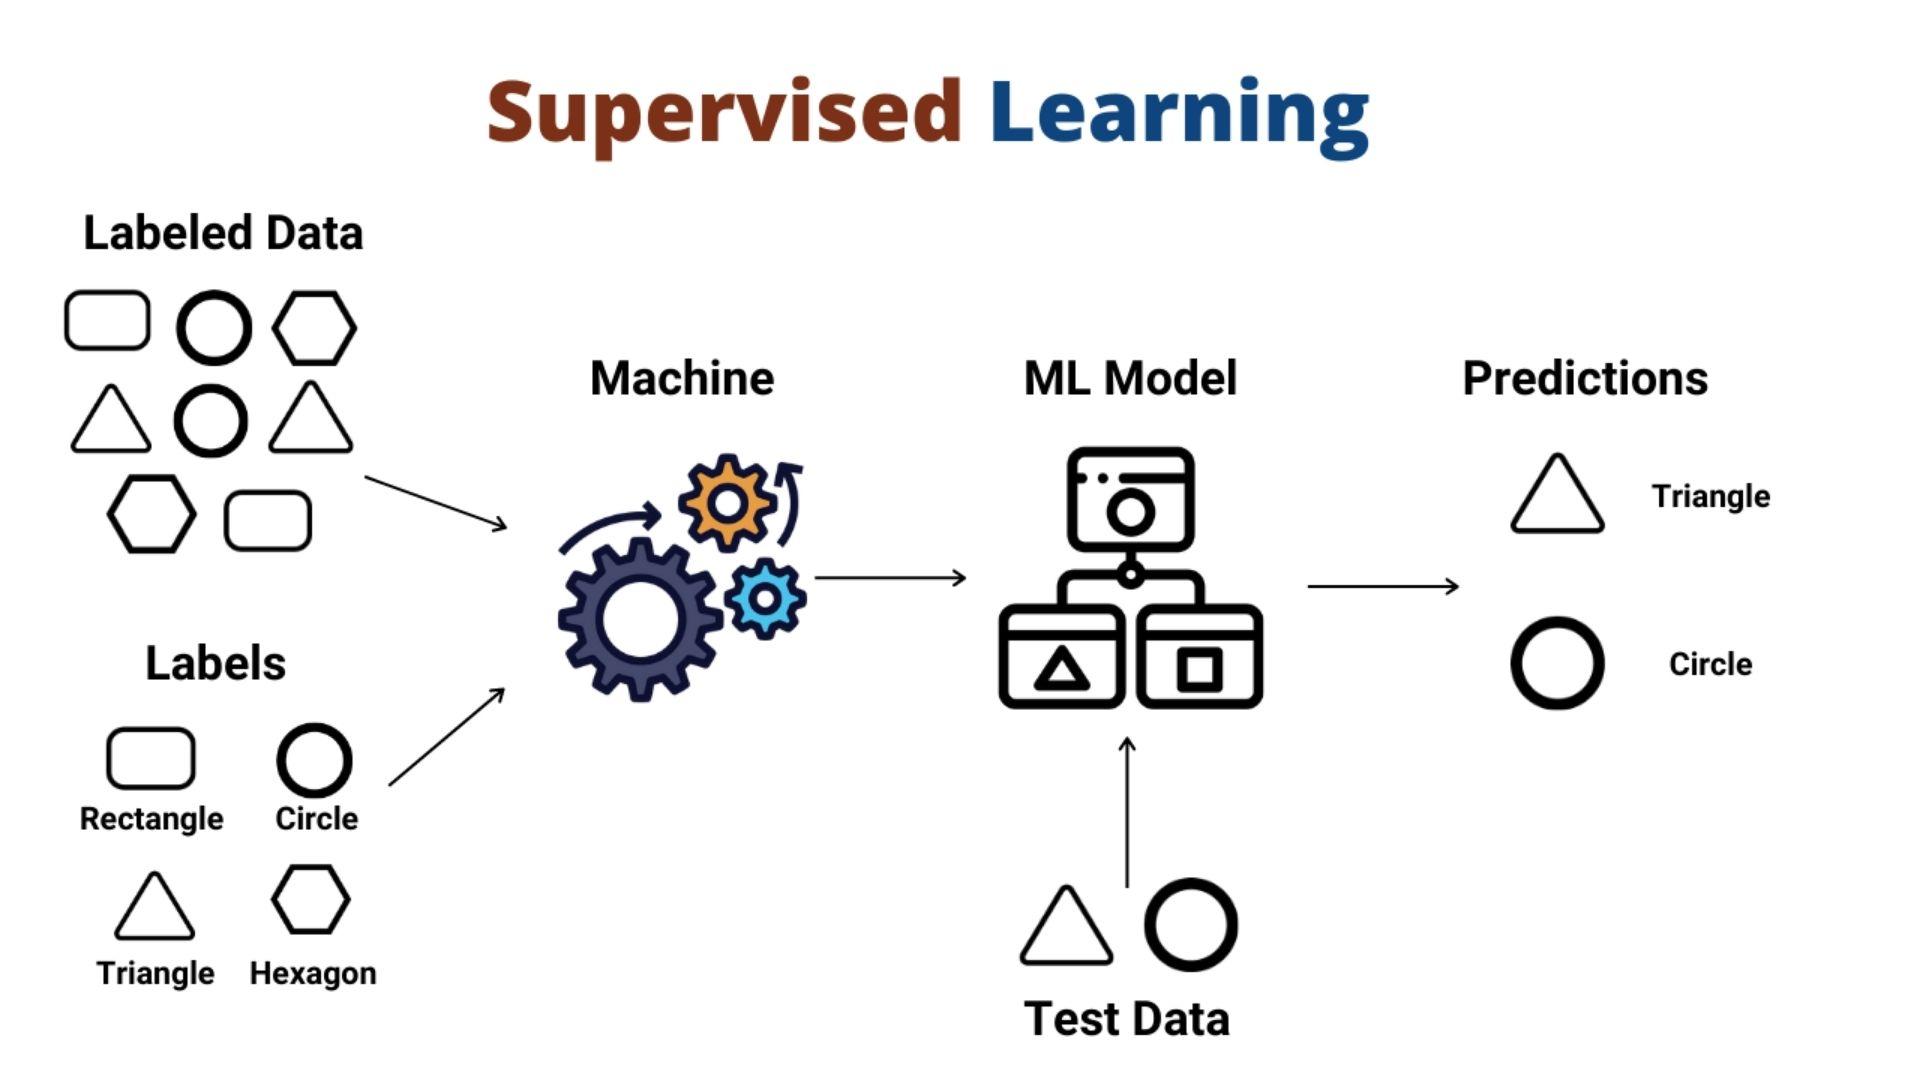

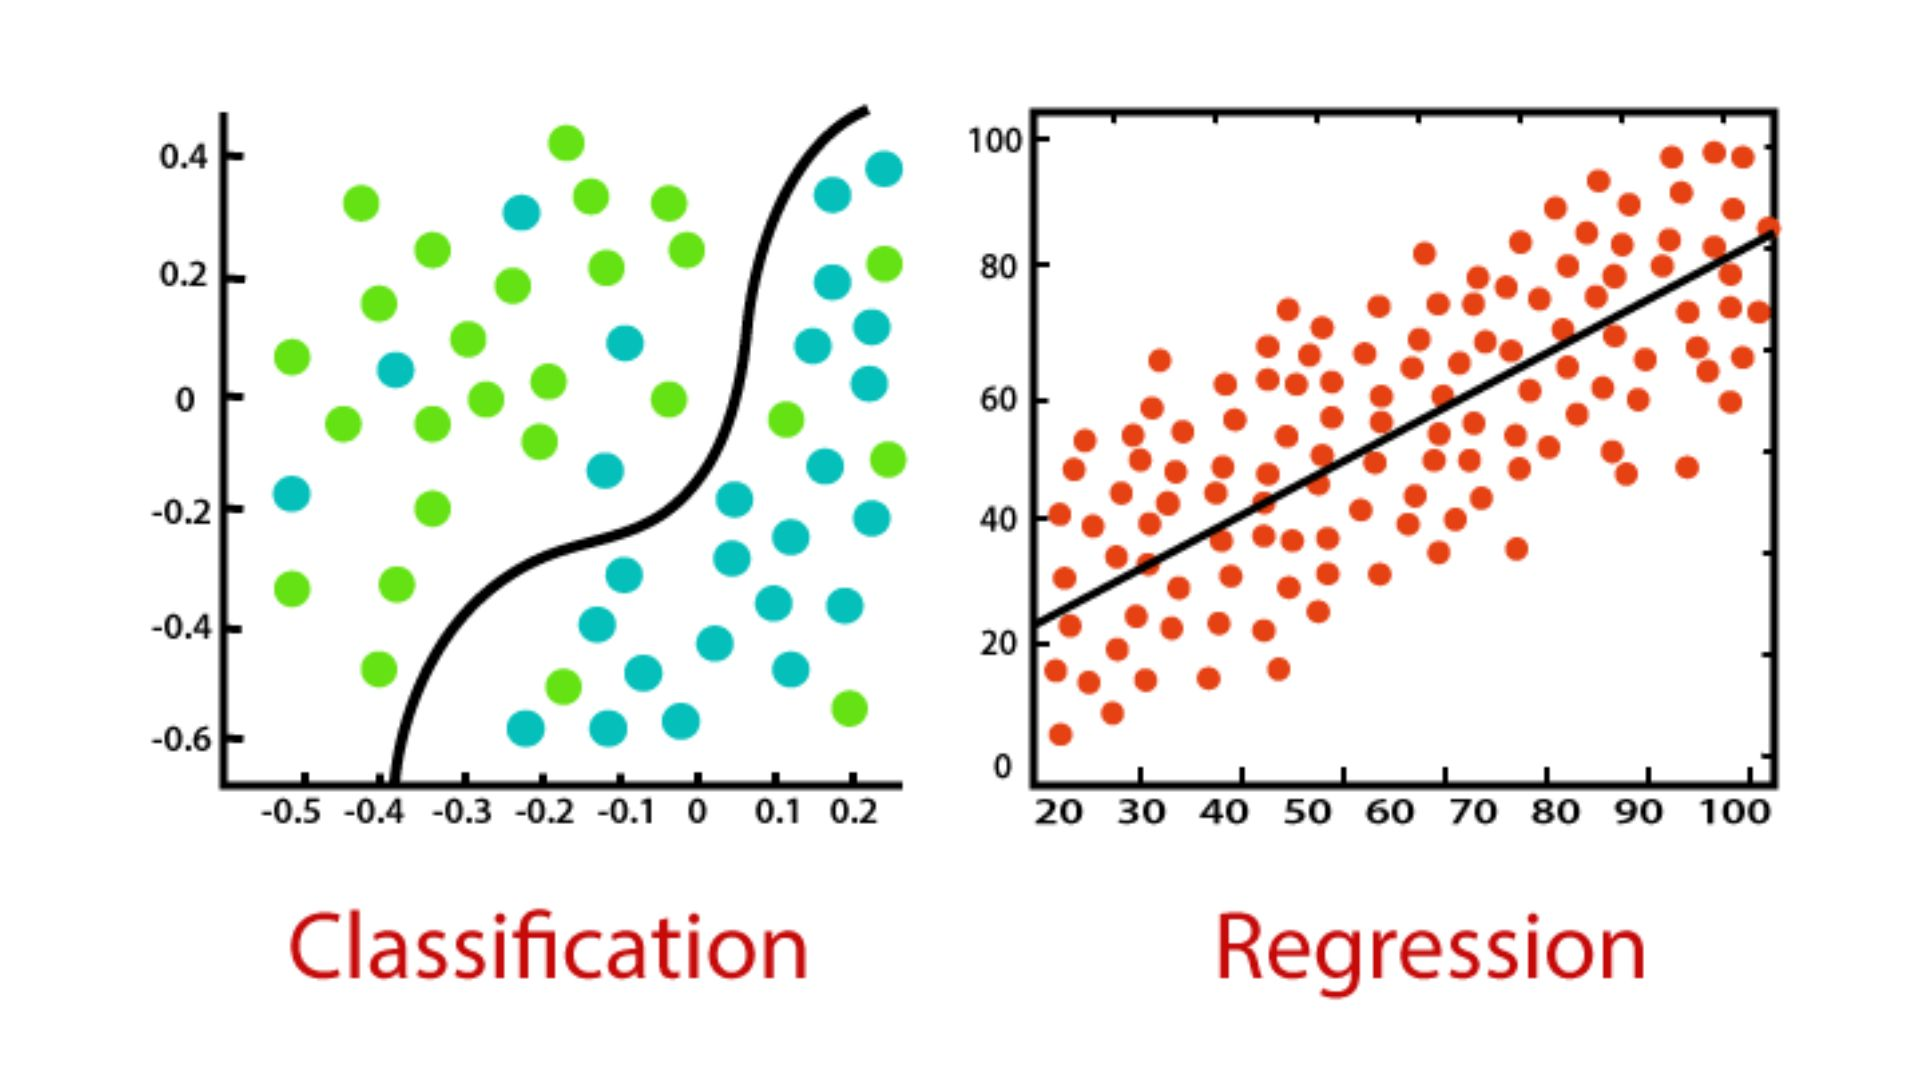

**Regression:** Predicts continuous values.
    **Example:** Predicting house prices ($350,000).






**Classification:** Assigns data to discrete categories.
    **Example:** Classifying emails as "Spam" or "Not Spam."

### **Unsupervised Learning**




The model is trained on unlabeled data and must find patterns or structure in the data on its own. Examples include clustering and dimensionality reduction.

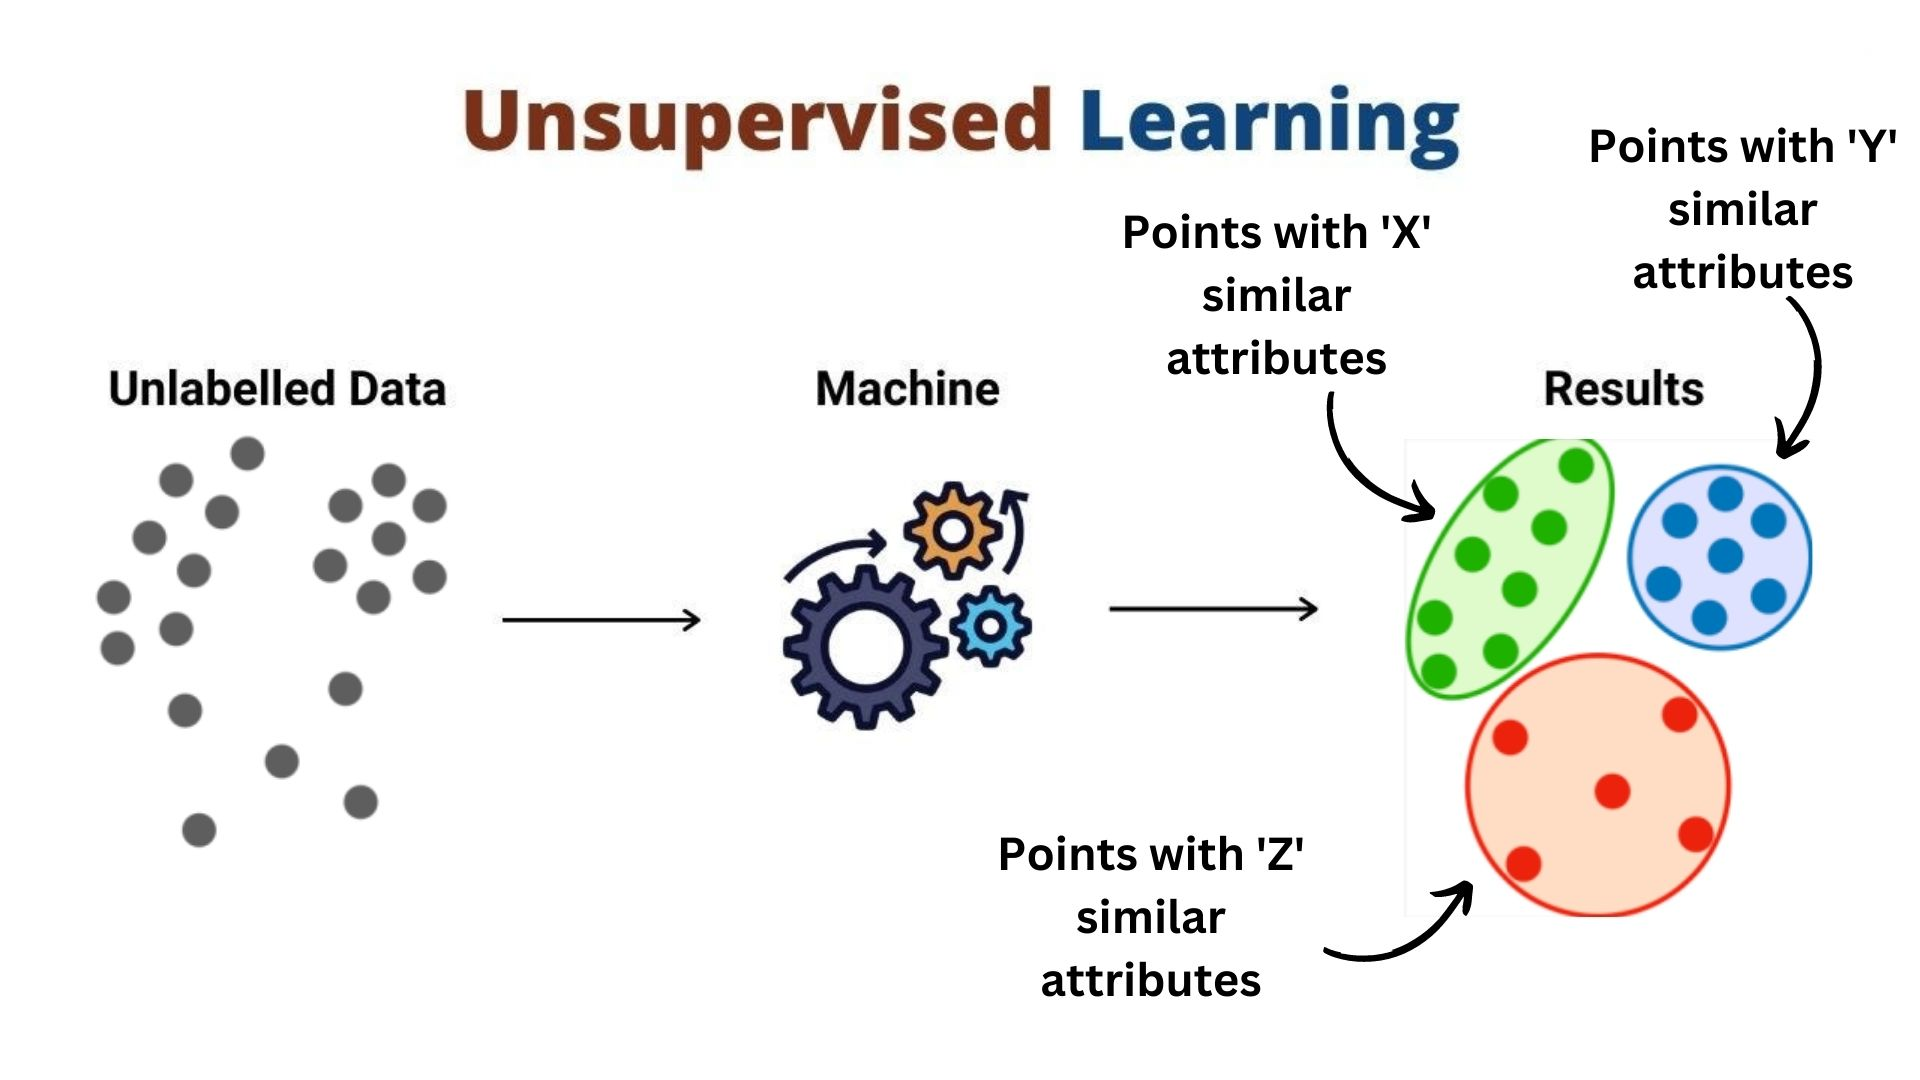

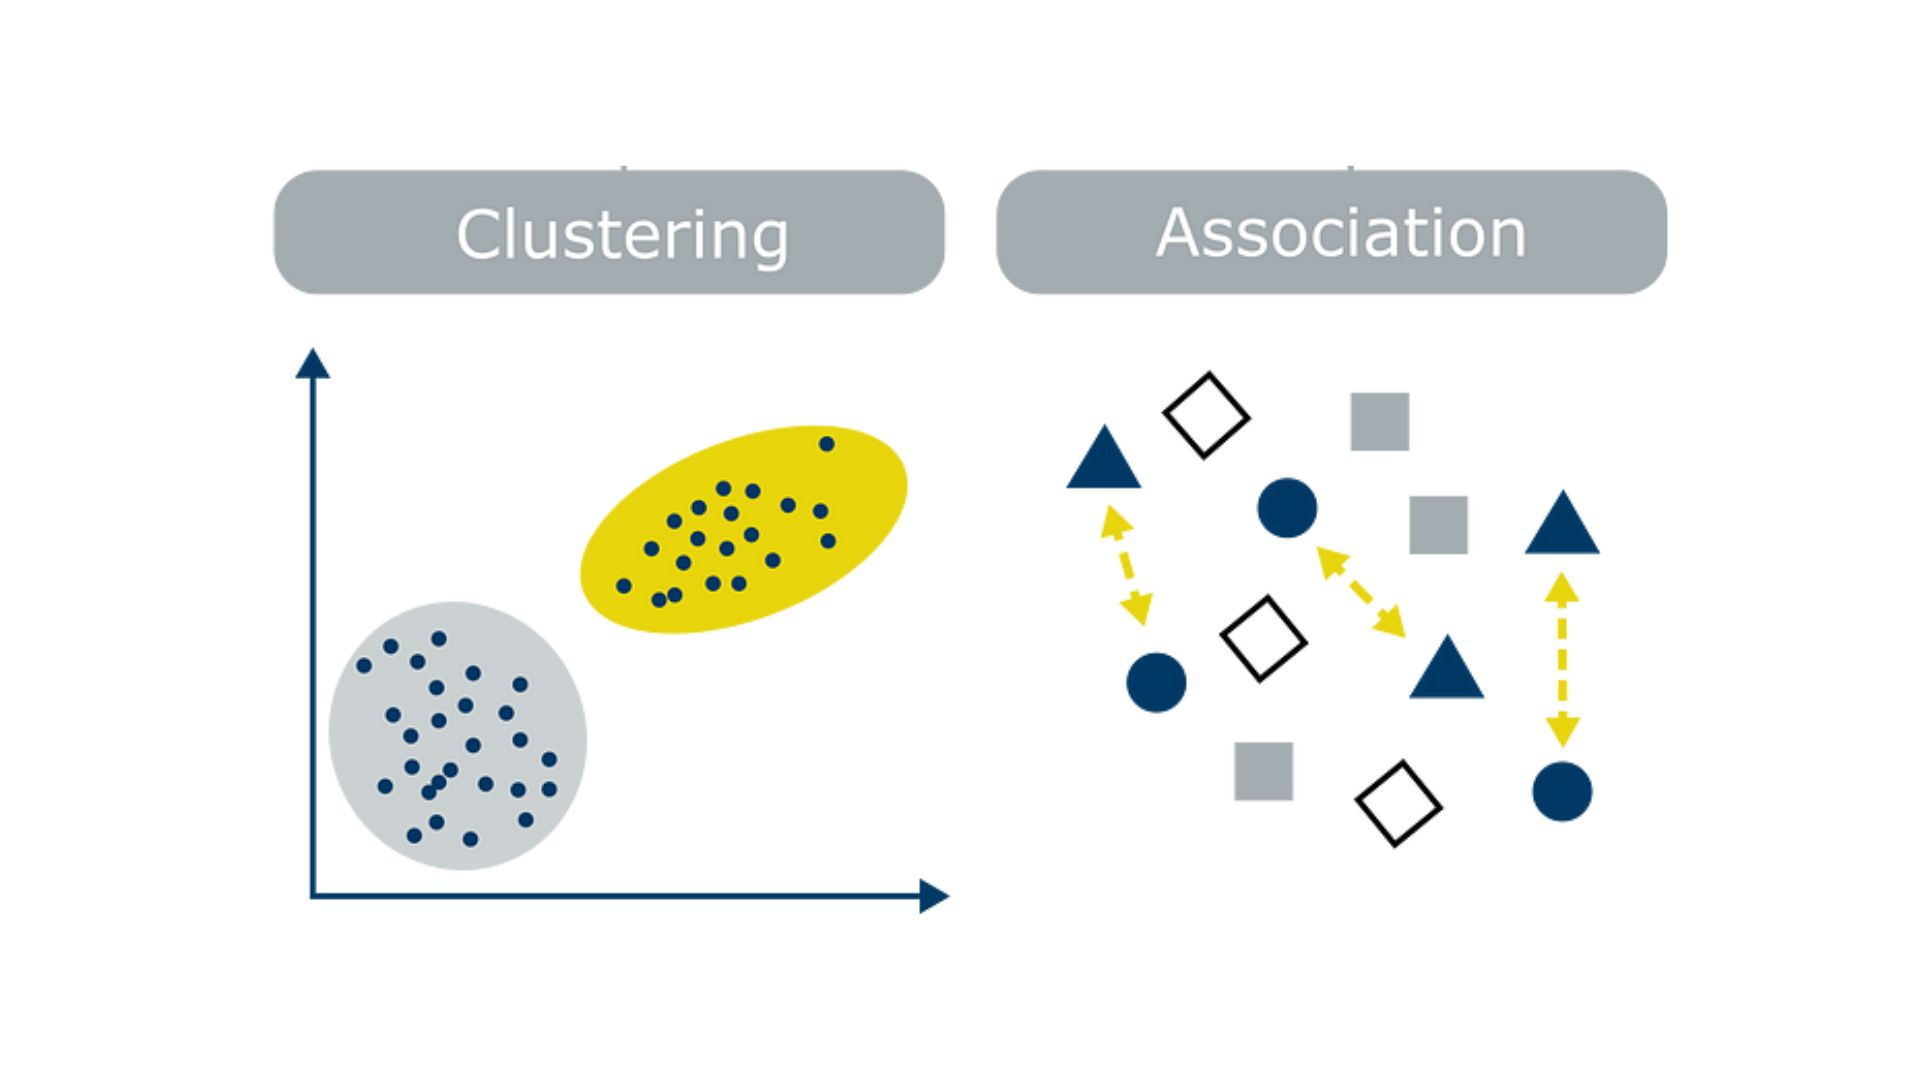

## Supervised Classification vs Unsupervised Clustering

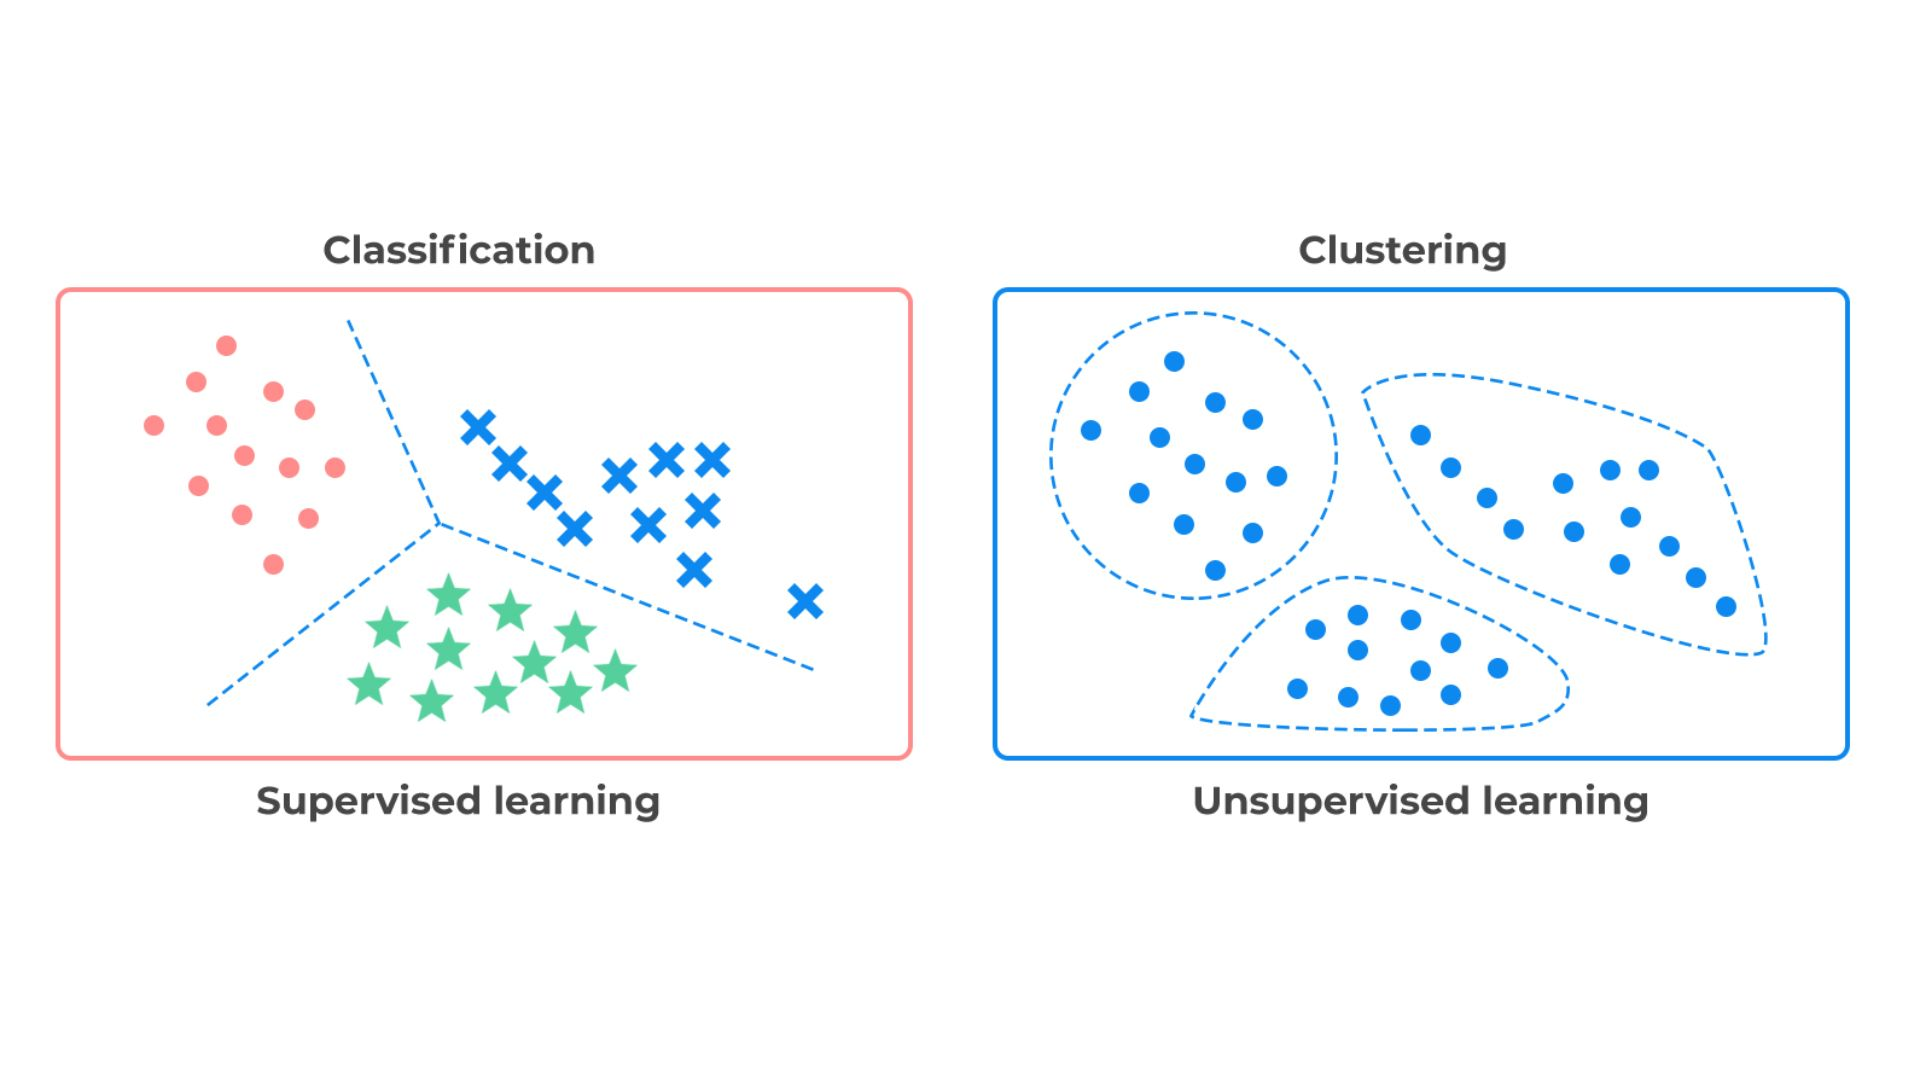

### **Reinforcement Learning**



 It is a type of machine learning in which the agent learns by trial and error when it interacts with its environment. The agent is given a reward for taking actions that lead to desired outcomes, and a penalty for taking actions that lead to undesired outcomes. The agent learns to take actions that maximize its rewards. For example.....

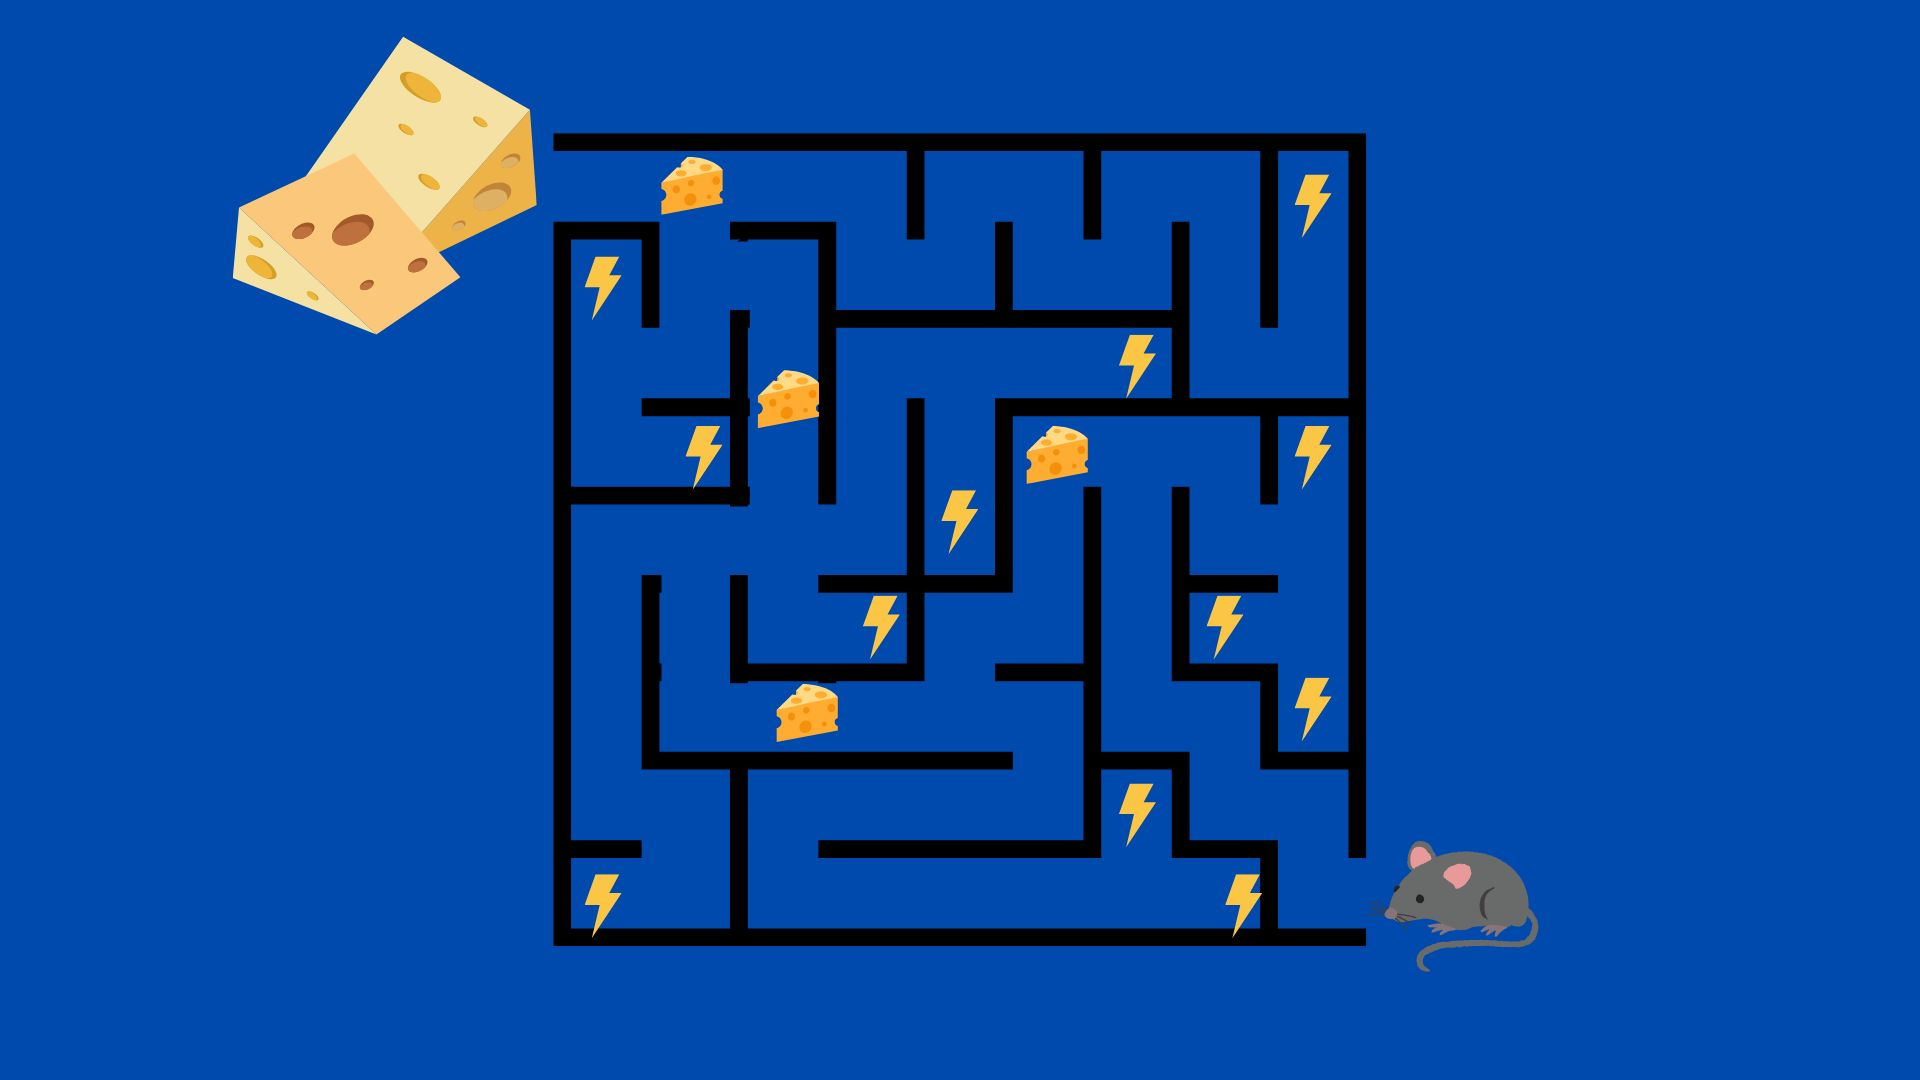

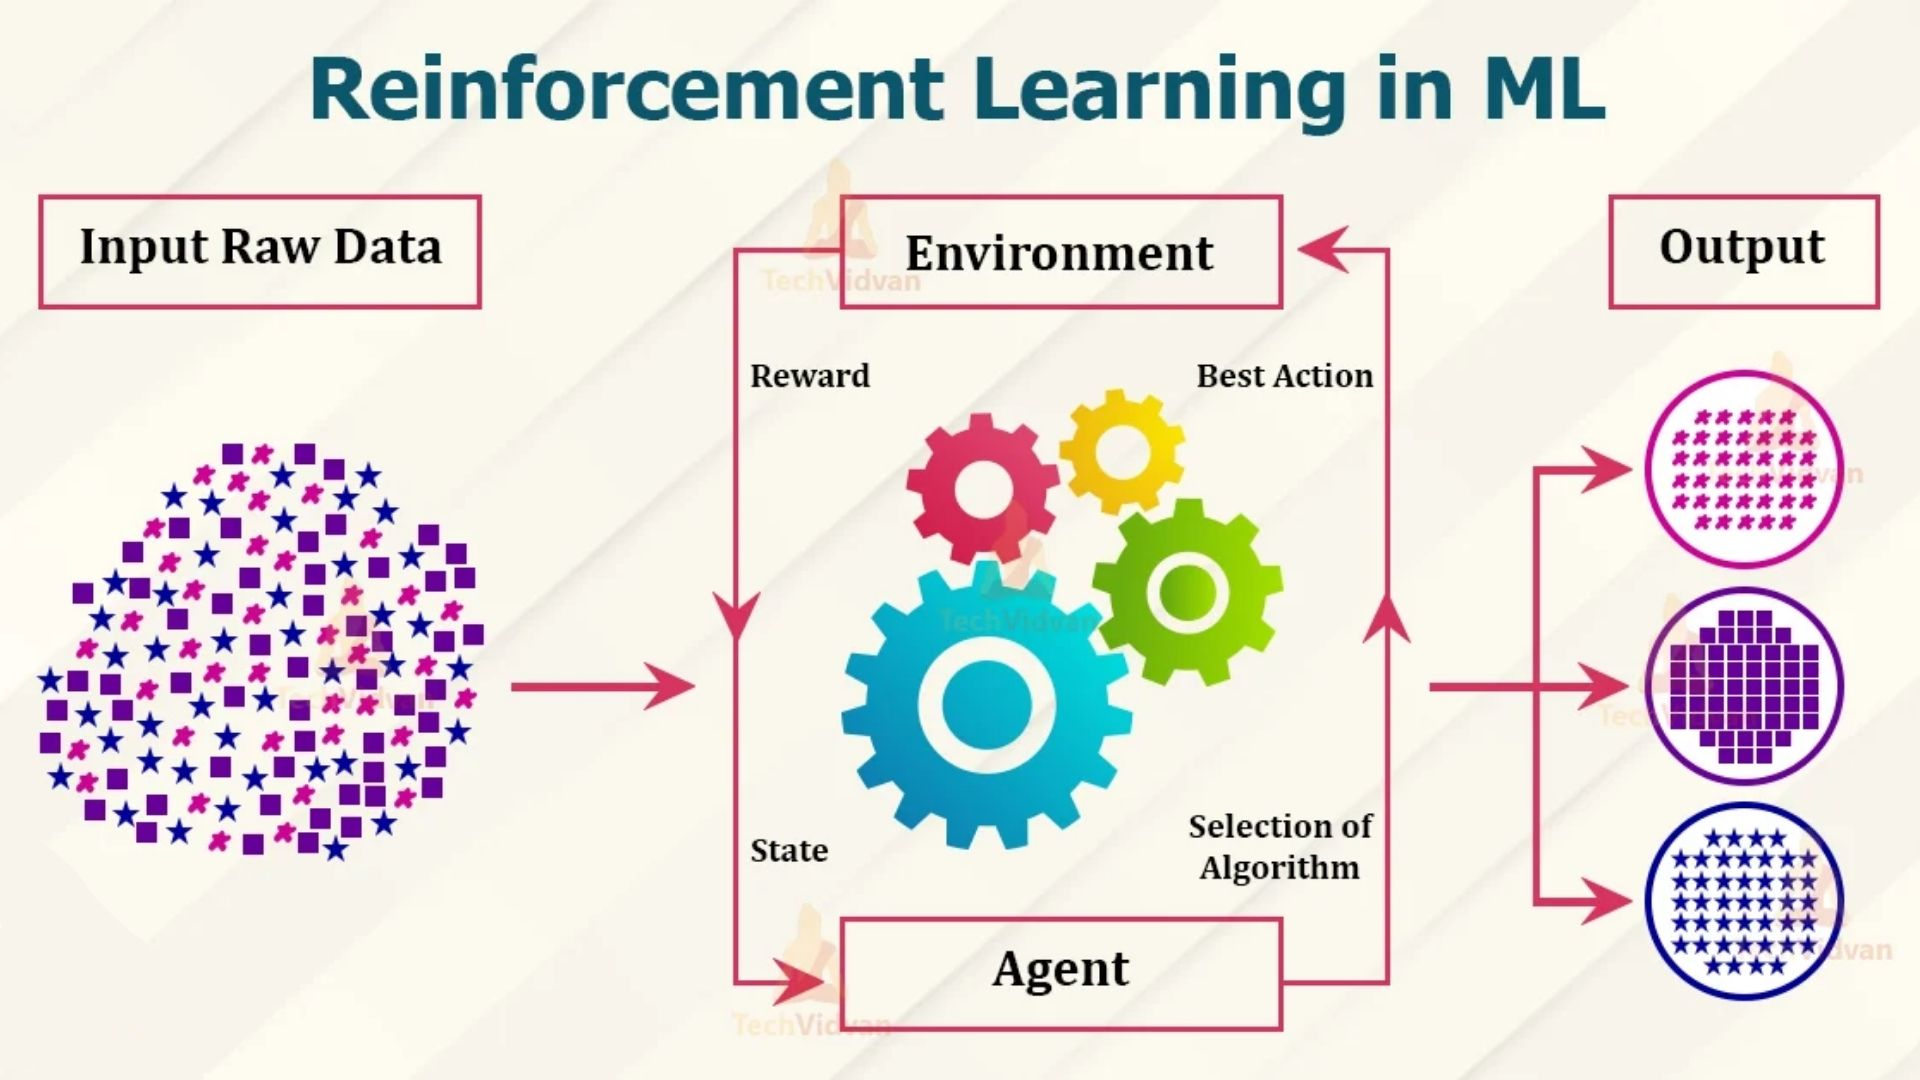

#### **Machine Learning Model Goal:**
 The goal of our machine learning model is to predict the risk category of loans based on various loan-related features such as the amount, interest rate, installment, and employment length. This model aims to classify loans into different risk categories (e.g., high risk, moderate risk, low risk) to help financial institutions manage their portfolios more effectively and make informed lending decisions. Given the imbalanced nature of the dataset, we will use ensemble learning methods, such as Random Forest and XGBoost, along with Logistic Regression and Decision Trees, to achieve robust predictive performance. Feature engineering, label encoding, and outlier removal will be performed to prepare the data for training these models.

# **Feature Engineering**

Importing the pandas library for data manipulation and analysis
and the numpy library for numerical operations and array manipulations


In [ ]:
import pandas as pd
import numpy as np

Reading a CSV file into a DataFrame for further data analysis


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/new_preprocessed_loan_data.csv')
df.head()

,Unnamed: 0,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Annual_Income,Debt_to_Income_Ratio,Verification_Status,...,Public_Record,Total_Accounts,Total_Received_Principal,Total_Received_Interest,Purpose,Loan_Status,Issue_Month,Issue_Year,region,Risk_Category
0,0,5000.0,10.65,162.87,36,10.0,RENT,24000.0,27.65,Verified,...,0.0,9.0,5000.00,861.07,credit_card,Fully Paid,Dec,2011,SouthWest,Low Risk
1,1,2500.0,15.27,59.83,60,0.5,RENT,30000.0,1.00,Source Verified,...,0.0,4.0,456.46,435.17,car,Charged Off,Dec,2011,SouthEast,High Risk
2,2,2400.0,15.96,84.33,36,10.0,RENT,12252.0,8.72,Not Verified,...,0.0,10.0,2400.00,603.65,small_business,Fully Paid,Dec,2011,MidWest,Low Risk
3,3,10000.0,13.49,339.31,36,10.0,RENT,49200.0,20.00,Source Verified,...,0.0,37.0,10000.00,2209.33,other,Fully Paid,Dec,2011,West,Low Risk
4,4,5000.0,7.90,156.46,36,3.0,RENT,36000.0,11.20,Source Verified,...,0.0,12.0,5000.00,631.38,wedding,Fully Paid,Dec,2011,SouthWest,Low Risk


In [ ]:
df.dropna(inplace=True) # dropping any null values that present in the dataset

In [ ]:
df['Verification_Status'].unique() # returns the unique values in the column

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

Since in the column Verification_Status, the values 'Source Verified' & 'Verified' imply the same thing, we'll replace all occurences of 'Source Verified' with 'Verified

In [ ]:
df['Verification_Status'] = df['Verification_Status'].replace('Source Verified', 'Verified')

In [ ]:
df['Home_Ownership'].value_counts() # returns a Series containing counts of unique values of the column.

,count
Home_Ownership,
MORTGAGE,125305
RENT,108288
OWN,21563
OTHER,168
NONE,42
ANY,1


Since the values 'NONE' & 'ANY' do not really provide any useful information about the Home Ownership Status of a person, we'll remove the rows where these values are present.

In [ ]:
# Filter the DataFrame to exclude rows where the 'Home_Ownership' column has the value 'NONE'
df = df[df['Home_Ownership'] != 'NONE']

# Further filter the DataFrame to exclude rows where the 'Home_Ownership' column has the value 'ANY'
df = df[df['Home_Ownership'] != 'ANY']

The 'Unnamed: 0' column in this dataset is actually a copy of the index. When you export a dataframe with an index as a csv file (like we did at the end of Day 1), the index also gets exported as a column. And when you read that csv back into pandas, it does not recognize that as the index and treats it like a normal column.

In [ ]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True) # dropping the column

<ipython-input-9-46b3d45c7a0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'], axis=1, inplace=True) # dropping the column


In [ ]:
df['Terms(Months)'].value_counts() # returns a Series containing counts of unique values of the column.

,count
Terms(Months),
36,194645
60,60679


Defining a list of columns to be dropped and dropping the specified columns from the DataFrame:

Why we are dropping these columns?

Because they contain either redudant information or information we will not have when we make the loan risk prediction in a real-world scenario.

**Deliquency_2yrs:** If you read the Data Card, you'll notice that this column is being used to determine a borrower's credit worthiness, which is also what the 'Grade' column is doing. So, we don't need this one.

**Total_Accounts:** If you look at the correlation heatmap we plotted before, you'll notice a very high positive correlation between this feature and 'Open Accounts'. Since, we're keeping that one, we don't need to keep this one.

**Sub_Grade:** Once again, the feature 'Grade' already gives us the same information, so we can drop 'Sub_Grade'.

**Total_Received_Principal** & **Total_Received_Interest**: We won't have these values before we predict the loan risk, since we're predicting the loan risk to decide whether the loan should be given or not.

**Loan_Status:** This is the feature we used to derive our target column - Risk Category. So, we definitely cannot use this data to train our model.

**Issue_Month** & **Issue_Year**: These features were created from the feature 'Issue_Date' which, as mentioned in the Data Card, is important for tracking the loan's duration and repayment schedule. Since, this model is for predicting loan risk, we don't need this feature.

**region:** Region often acts as a proxy for other socioeconomic factors, such as income levels, employment rates, or property values - all of which are covered by other features that we're keeping. So we can drop 'region'.

**Public_Record:** Once again, this feature is used to assess a borrower's legal and financial history, which the feature 'Grade' already does.

**Annual_Income:** The feature 'Debt_to_Income_Ratio' already captures the information that this feature provides.

In [ ]:
columns_to_drop = ['Delinquency_2yrs', 'Total_Accounts','Sub_Grade',
       'Total_Received_Principal', 'Total_Received_Interest',
                   'Loan_Status', 'Issue_Month', 'Issue_Year', 'region',
                   'Public_Record', 'Annual_Income']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.columns # checking the columns of the updated dataframe

Index(['Loan_Amount', 'Interest_Rate', 'Installment', 'Terms(Months)',
       'Employment_Length', 'Home_Ownership', 'Debt_to_Income_Ratio',
       'Verification_Status', 'Grade', 'Open_Accounts', 'Purpose',
       'Risk_Category'],
      dtype='object')

# **Label Encoding**

In [ ]:
df.info() # prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
Index: 255324 entries, 0 to 266027
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Loan_Amount           255324 non-null  float64
 1   Interest_Rate         255324 non-null  float64
 2   Installment           255324 non-null  float64
 3   Terms(Months)         255324 non-null  int64  
 4   Employment_Length     255324 non-null  float64
 5   Home_Ownership        255324 non-null  object 
 6   Debt_to_Income_Ratio  255324 non-null  float64
 7   Verification_Status   255324 non-null  object 
 8   Grade                 255324 non-null  object 
 9   Open_Accounts         255324 non-null  float64
 10  Purpose               255324 non-null  object 
 11  Risk_Category         255324 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 25.3+ MB


Machine learning models require numerical input, so features of data type 'object' need to be encoded or transformed into a numerical format before fitting a model.

We'll use Label Encoding and One-Hot Encoding to convert categorical variables into numerical values.

**Encoding the column 'Purpose' using pd.get_dummies():**

pd.get_dummies() is a Pandas function used for converting categorical variables into dummy/indicator variables. In this, each unique category becomes a separate column with binary values indicating the presence of that category.

In [ ]:
df['Purpose'].unique() # returns all the unique values in

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [ ]:
nominal_columns = ['Purpose']
df = pd.get_dummies(df, columns=nominal_columns)

**Encoding the columns 'Grade', 'Home_Ownership' & 'Verification_Status' using Label Encoder:**


 LabelEncoder is a class from the sklearn.preprocessing module used to convert categorical labels into numerical values. Each category is assigned a unique integer value.

 This is useful when the categorical feature is ordinal that is the categories have a meaningful order.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_verification_status = LabelEncoder()
df['Verification_Status'] = le_verification_status.fit_transform(df['Verification_Status'])

In [ ]:
le_grade = LabelEncoder()
df['Grade'] = le_grade.fit_transform(df['Grade'])

le_home_ownership=LabelEncoder()
df['Home_Ownership'] = le_home_ownership.fit_transform(df['Home_Ownership'])


Showing what values the Label Encoder has assigned to each categorical variable:

In [ ]:
verification_status_mapping = dict(zip(le_verification_status.classes_, le_verification_status.transform(le_verification_status.classes_)))
grade_mapping = dict(zip(le_grade.classes_, le_grade.transform(le_grade.classes_)))
home_ownership_mapping = dict(zip(le_home_ownership.classes_, le_home_ownership.transform(le_home_ownership.classes_)))

print("Verification Status Mapping:", verification_status_mapping)
print("Grade Mapping:", grade_mapping)
print("Home Ownership Mapping:", home_ownership_mapping)

Verification Status Mapping: {'Not Verified': 0, 'Verified': 1}
Grade Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
Home Ownership Mapping: {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255324 entries, 0 to 266027
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Loan_Amount                 255324 non-null  float64
 1   Interest_Rate               255324 non-null  float64
 2   Installment                 255324 non-null  float64
 3   Terms(Months)               255324 non-null  int64  
 4   Employment_Length           255324 non-null  float64
 5   Home_Ownership              255324 non-null  int64  
 6   Debt_to_Income_Ratio        255324 non-null  float64
 7   Verification_Status         255324 non-null  int64  
 8   Grade                       255324 non-null  int64  
 9   Open_Accounts               255324 non-null  float64
 10  Risk_Category               255324 non-null  object 
 11  Purpose_car                 255324 non-null  bool   
 12  Purpose_credit_card         255324 non-null  bool   
 13  Purpose_debt_consol

As you can see above, all features except Risk_Category now contain non-object values.

In [ ]:
df.head()

,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Debt_to_Income_Ratio,Verification_Status,Grade,Open_Accounts,...,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,5000.0,10.65,162.87,36,10.0,3,27.65,1,1,3.0,...,False,False,False,False,False,False,False,False,False,False
1,2500.0,15.27,59.83,60,0.5,3,1.00,1,2,3.0,...,False,False,False,False,False,False,False,False,False,False
2,2400.0,15.96,84.33,36,10.0,3,8.72,0,2,2.0,...,False,False,False,False,False,False,False,True,False,False
3,10000.0,13.49,339.31,36,10.0,3,20.00,1,2,10.0,...,False,False,False,False,False,True,False,False,False,False
4,5000.0,7.90,156.46,36,3.0,3,11.20,1,0,9.0,...,False,False,False,False,False,False,False,False,False,True


**Another way to encode data - One Hot Encoder**

OneHotEncoder is a class from the sklearn.preprocessing module that converts categorical features into a one-hot encoded format. It creates binary columns for each category and encodes the presence of each category with 0s and 1s.

It is used when the categories are non-ordinal (i.e., they do not have a meaningful order).



In [ ]:
df_new=df.copy() # making a copy of the dataframe

**Mapping the values of the column 'Risk_Category' to integers:**

In [ ]:
df_new['Risk_Category'].value_counts() # counting the occurences of each unique value in the column

,count
Risk_Category,
Low Risk,192309
High Risk,53242
Moderate Risk,9773


Creating a dictionary to map 'Risk_Category' values to numerical representations. 'High Risk' is mapped to 2, 'Moderate Risk' to 1, and 'Low Risk' to 0. Applying the mapping to the 'Risk_Category' column in the DataFrame to convert categorical risk levels to numerical values.


In [ ]:
risk_mapping = {
    'High Risk': 2,
    'Moderate Risk': 1,
    'Low Risk': 0
}

df_new['Risk_Category'] = df_new['Risk_Category'].map(risk_mapping)


In [ ]:
df_new['Risk_Category'].value_counts()

,count
Risk_Category,
0,192309
2,53242
1,9773


Notice how the values in the column have changed.

# **Outlier Removal**

Outliers are data points that differ significantly from the majority of the data in a dataset. They are observations that fall far outside the typical range of values for a given feature. Outliers can occur due to various reasons, including measurement errors, data entry mistakes, or genuine variability in the data.

Outliers can negatively affect ML models by skewing results, increasing model variance, and leading to inaccurate predictions.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

We can check for outliers using box-plots. They are points outside the whiskers of the box-plot.

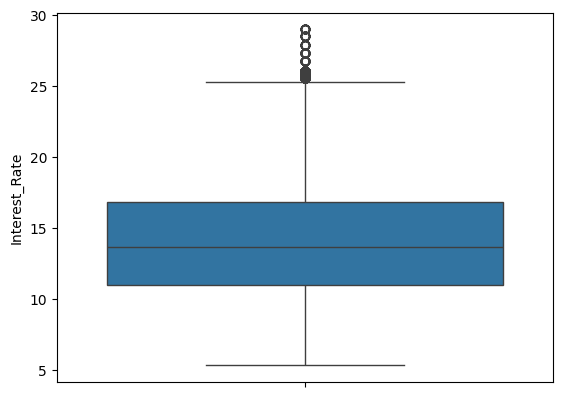

In [ ]:
sns.boxplot(df_new['Interest_Rate'])
plt.show()

Outliers are also defined as values that fall below Q1 - 1.5 x IQR or above Q3 + 1.5 x IQR, where Q1 & Q3 are the first and third quartiles, respectively and IQR is the interquartile range.

Defining a function to remove outliers from specified columns using the IQR method by filtering values within the calculated bounds. Applying this function to columns of interest to clean the DataFrame.

In [ ]:
def remove_outliers_iqr(df_new, columns):

    for column in columns:
        Q1 = df_new[column].quantile(0.25)
        Q3 = df_new[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_new = df_new[(df_new[column] >= lower_bound) & (df_new[column] <= upper_bound)]
    return df_new

columns_to_check = ['Loan_Amount', 'Interest_Rate','Employment_Length']
df_new = remove_outliers_iqr(df_new, columns_to_check)


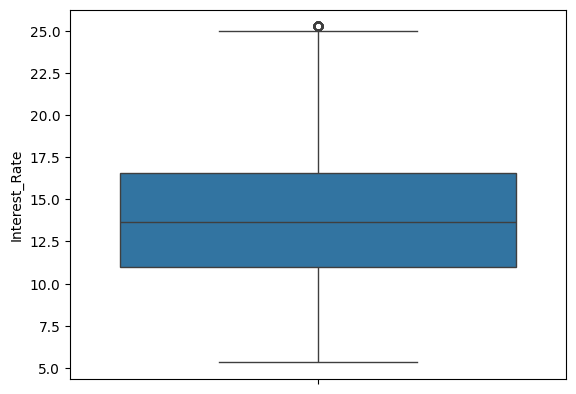

In [ ]:
sns.boxplot(df_new['Interest_Rate'],whis=1.5)
plt.show()

Compare this boxplot to the previous one. You'll notice that the outliers have been removed.

# **Dividing the Dataset into Features and Target Column**

**Finding the correlation between each feature and the target - Risk_Category:**

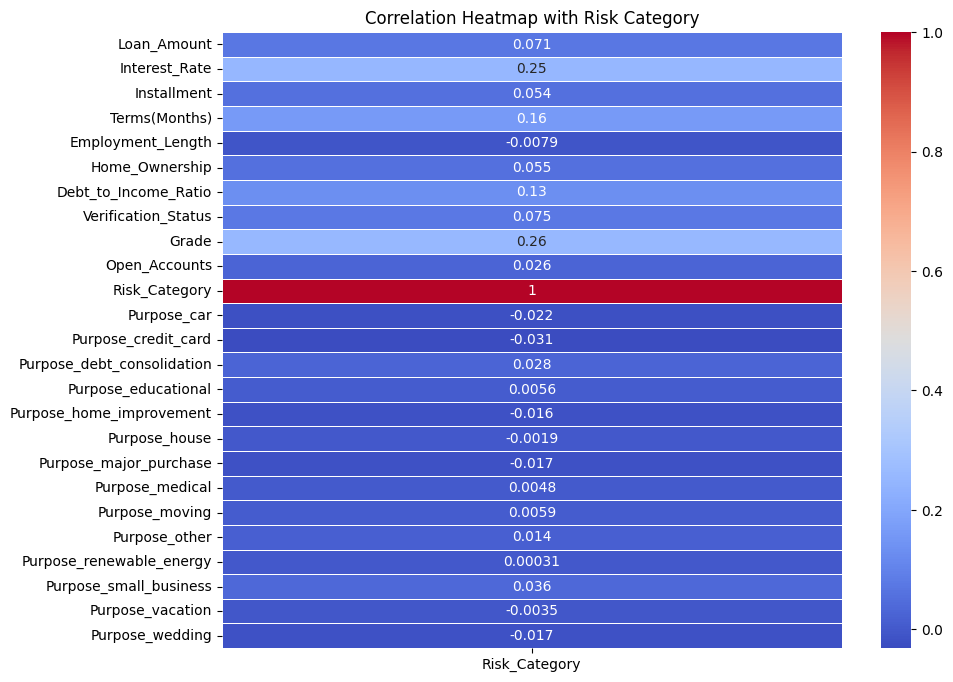

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_new.corr()

# Extract the correlation of each feature with the 'Risk_Category'
risk_category_corr = correlation_matrix[['Risk_Category']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(risk_category_corr, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap with Risk Category')
plt.show()


There is a weak positive correlation between Risk Category and Grade & Risk Category and Interest Rate.

In [ ]:
feature_columns = df_new.columns[df_new.columns != 'Risk_Category'] # all columns that are not Risk_Category
target_column = 'Risk_Category'

In [ ]:
X = df_new[feature_columns]
y = df_new[target_column]

Here, X is the dataframe of all the features we're going to use for the prediction and Y is the array of the class labels (Low Risk, High Risk, Moderate Risk) corresponding to those features.

# **Scaling the Dataset**

Data Scaling is the process of adjusting the range of features in a dataset to ensure they are on a similar scale. It ensures that all features contribute equally to the model training process.

Standardization Formula:

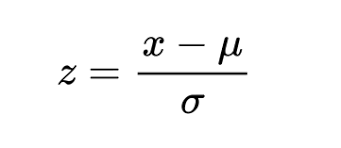

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.06963604, -0.73836692, -1.05681149, ..., -0.13859492,
        -0.07835358, -0.08725089],
       [-1.37539683,  0.33673064, -1.47627628, ..., -0.13859492,
        -0.07835358, -0.08725089],
       [-1.38762726,  0.49729715, -1.3765394 , ...,  7.21527148,
        -0.07835358, -0.08725089],
       ...,
       [-0.36332861, -1.81346447, -0.38478851, ..., -0.13859492,
        -0.07835358, -0.08725089],
       [-0.91981325,  0.62063086, -0.82273515, ..., -0.13859492,
        -0.07835358, -0.08725089],
       [-1.19194035, -1.19912301, -1.20450348, ..., -0.13859492,
        -0.07835358, -0.08725089]])

As you can see, the values of X have scaled down to much smaller values.

#**Train Test Split**

Train-Test Split is a way to divide your data into parts so you can train your model on one part and test its performance on another.

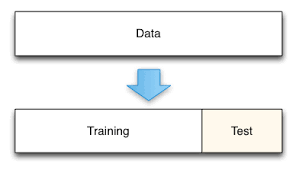

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

using a 70-30 split with 70% for training and 30% for testing

# **Random Forest Classifier**

The Random Forest Classifier is an ensemble learning method used for classification tasks. It combines multiple decision trees to make a more accurate and robust model.

It builds a collection of decision trees during training. Each tree is trained on a random subset of the data and features.

For classification, each tree in the forest casts a "vote" for a class. The class with the most votes across all trees becomes the final prediction.

By averaging predictions from many trees, it reduces the risk of overfitting and increases overall accuracy.


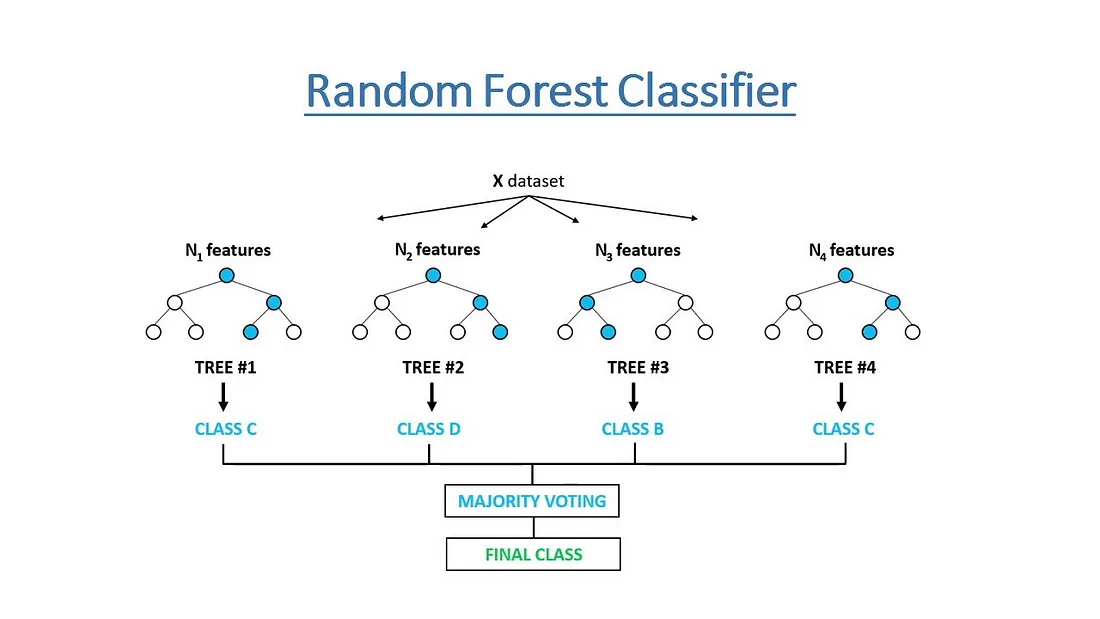

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create an instance of the RandomForestClassifier
clf = RandomForestClassifier(random_state=42) # random_state=42 is used to ensure reproducibility by setting a seed for random number generation

# Fit the RandomForestClassifier model to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Use the trained RandomForestClassifier model to make predictions on the test data
y_pred = clf.predict(X_test) # the predicted class labels for each sample in X_test are being stored in y_pred

**Evaluating Model Performance:**

**1.    Accuracy Score**

Measures the proportion of correctly classified instances out of the total number of instances.

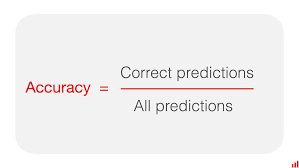


It is used to evaluate the overall performance of a classification model, especially useful when classes are balanced.


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7507273469280289


**2. Confusion Matrix**

A table that summarizes the performance of a classification model by showing the counts of true positives, false positives, true negatives, and false negatives.

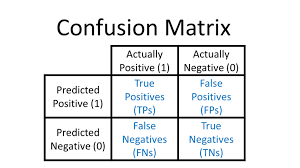

It helps in understanding the types of errors made by the model.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[55381    30  2066]
 [ 2513    92   255]
 [14029    42  1553]]


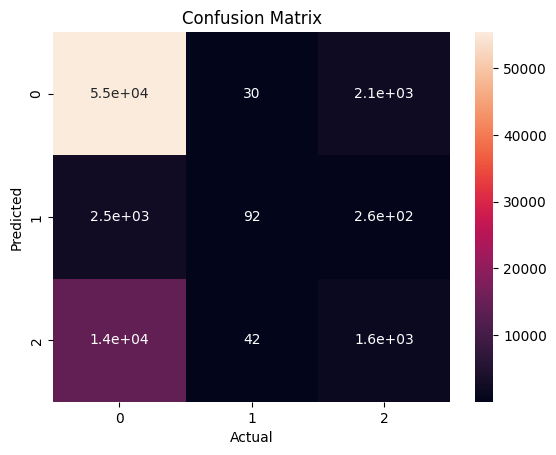

In [ ]:
sns.heatmap(cm,annot=True).set(title='Confusion Matrix', xlabel='Actual', ylabel='Predicted')
plt.show()

***Observations:***

*   The model performs well with class 0, with a high number of true positives (55381) and a relatively low number of false negatives (2066).
*   There is a significant number of false positives (14029), where instances of class 2 are incorrectly predicted as class 0.
*   The model struggles with class 1, having a low number of true positives (92) and a higher number of false negatives (255), indicating it often misses instances of class 1.
*   The number of false positives (30) is relatively low.
*   The model has a moderate performance with class 2, with a decent number of true positives (1553) but a substantial number of false negatives (42) and false positives (2066).



All these things indicate that there is a class imbalance in the dataset we need to address.

**3. Classification Report**

Provides a detailed evaluation of a classification model, including precision, recall, F1-score, and support for each class.

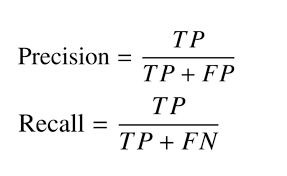

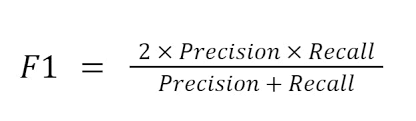

Support: The number of actual occurrences of the class in the dataset.

It provides a comprehensive view of model performance, particularly useful in cases of class imbalance.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86     57477
           1       0.56      0.03      0.06      2860
           2       0.40      0.10      0.16     15624

    accuracy                           0.75     75961
   macro avg       0.58      0.37      0.36     75961
weighted avg       0.69      0.75      0.68     75961



***Observations:***

*   Class 0 has a high recall and a good F1-score, indicating that the model performs well in identifying instances of class 0.
*   Class 1 & Class 2 have very poor recall and a low F1-score, suggesting that the model struggles significantly to correctly identify instances of class 1 & 2.

The model is biased towards class 0.

**4. ROC & AUC Curve** (extra topic - for reference)

The ROC (Receiver Operating Characteristic) curve is the True Positive Rate (TPR) plotted against the False Positive Rate (FPR). It helps visualize the tradeoff between them.

The AUC (Area Under the Curve) represents the area under the ROC curve. It provides a single value between 0 to 1 (with 1 indicating perfect performance) that summarizes the overall performance of the classification model.

In [ ]:
y_pred_proba = clf.predict_proba(X_test) # provides the predicted probability for each class for each sample in the test dataset

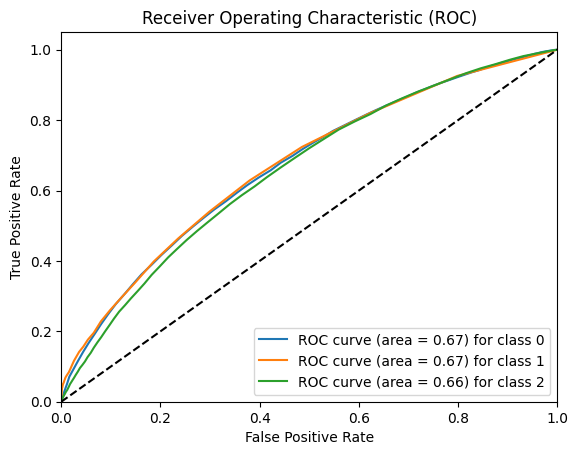

In [ ]:
from sklearn.metrics import roc_curve, auc

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %i' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

***Observations:*** The ROC curve of all the classes is above the diagonal and the AUC is around 0.67, which indicates that the model is doing slightly better than just randomly guessing the answer but still needs a lot of improvement.

# **Logistic Regression**

Logistic Regression is used for binary classification tasks. It predicts the probability that a given input belongs to a particular class.

It estimates probabilities using a logistic function (sigmoid function), which outputs a value between 0 and 1. Based on this probability, it classifies the input into one of the two classes.

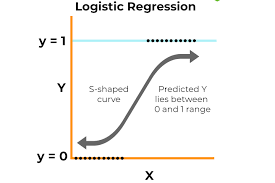

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define a grid of hyperparameters to search over
# 'C' is the regularization strength, with lower values indicating stronger regularization
# 'penalty' specifies the type of regularization to use ('none' for no regularization, 'l2' for L2 regularization)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['none', 'l2'],
}


**Hyperparameters** are parameters that are explicitly defined to control the learning process before applying a machine-learning algorithm to a dataset.

In [ ]:
# Initialize the LogisticRegression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

**Grid Search CV (Cross-Validation)** is a technique used to find the best hyperparameters for a machine learning model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV to perform an exhaustive search over the parameter grid
# 'scoring' specifies the metric to optimize (accuracy in this case)
# 'cv' specifies the number of cross-validation folds
# 'n_jobs=-1' allows parallel processing using all available CPU cores
# 'verbose=3' provides detailed output about the progress of the grid search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,scoring='accuracy', cv=2,n_jobs=-1,verbose=3)

In [ ]:
# Fit GridSearchCV on the training data to search for the best hyperparameters
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
# Retrieve the best hyperparameters found during the grid search
best_params = grid_search.best_params_
# Retrieve the best score achieved with the best hyperparameters
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'C': 0.001, 'penalty': 'none'}
Best Cross-Validation Score: 0.7566491012288283


In [ ]:
# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nBest Model Performance:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Best Model Performance:
Accuracy: 0.7566777688550703
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     57477
           1       0.40      0.02      0.03      2860
           2       0.46      0.07      0.13     15624

    accuracy                           0.76     75961
   macro avg       0.54      0.36      0.34     75961
weighted avg       0.69      0.76      0.68     75961



***Observations:*** Once again, you'll notice that the recall and f1 score of class 1 and 2 is very poor, indicating that the model isn't really correctly identifying instances of those 2 classes.

# **XGBoost**

XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm. It builds a series of decision trees sequentially, where each new tree corrects errors made by the previous trees. The model combines all these trees to make final predictions.

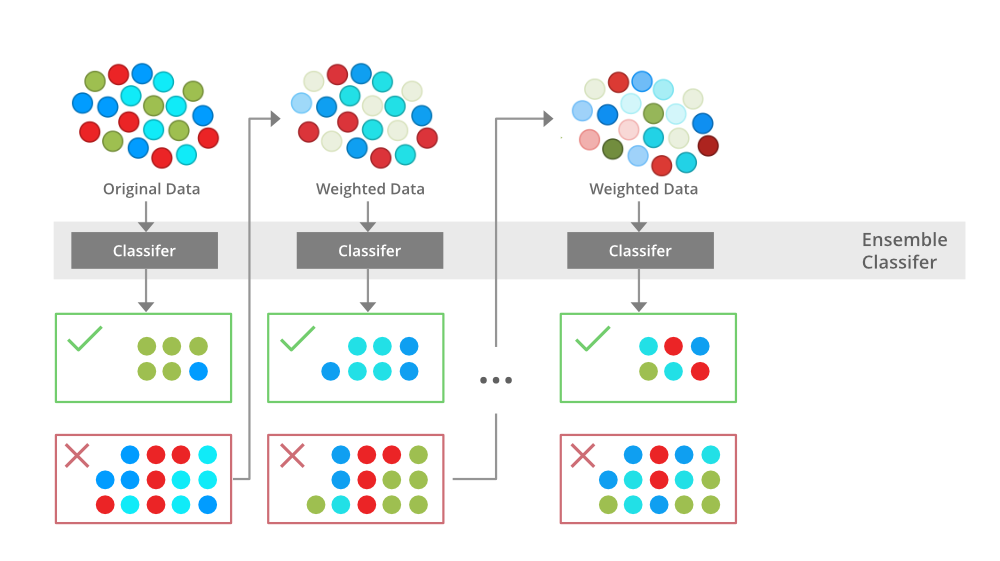

As we saw during the EDA and while fitting Logistic Regression & Random Forest Classifier, there is a class imbalance in our dataset.

In [ ]:
y.value_counts()

,count
Risk_Category,
0,191332
2,52269
1,9602


To deal with thus class imbalance, we'll use an oversampling (increasing the number of instances in the underrepresented class) method called SMOTE.

SMOTE (Synthetic Minority Over-sampling Technique) is a method used to balance imbalanced datasets by creating synthetic samples for the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE()

In [ ]:
# Apply SMOTE to the scaled feature set (X_scaled) and the target variable (y)
# This will create a balanced dataset by oversampling the minority class
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.7,test_size=0.3, random_state=42)

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100)

# eval_metric='mlogloss' specifies the evaluation metric to use, in this case, log loss for multi-class classification
# n_estimators=100 sets the number of boosting rounds (trees) to 100

# Train the XGBClassifier on the resampled training data
xgb_clf.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# use the model to make predictions on the resampled test data
y_pred_xgb = xgb_clf.predict(X_test_resampled)

In [ ]:
print(accuracy_score(y_test_resampled, y_pred_xgb))

0.7215024477494062


In [ ]:
print(classification_report(y_test_resampled, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82     57490
           1       0.76      0.73      0.75     57700
           2       0.66      0.50      0.57     57009

    accuracy                           0.72    172199
   macro avg       0.72      0.72      0.71    172199
weighted avg       0.72      0.72      0.71    172199



***Observations:*** You'll notice that the accuracy has dropped slightly but in imbalanced datasets accuracy can often be misleading. Now that we have handled the imbalance, you'll notice that the recall and f1 score of class 1 & 2 has improved significantly.


This is the model we'll use for deployment.

# **Final Model:**

In [ ]:
# Initialize an XGBClassifier instance for the final model
xgb_clf_final = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100)

In [ ]:
# Train the final XGBClassifier on the entire resampled dataset
xgb_clf_final.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Import the joblib library for saving and loading Python objects
import joblib

# Define the file path where the model will be saved
model_path = 'xgb_model.pkl'

# Save the trained XGBClassifier model to the specified file path using joblib
# joblib.dump serializes the model object and writes it to a file
joblib.dump(xgb_clf, model_path)

print(f"Model saved to {model_path}")

Model saved to xgb_model.pkl
